dataset: https://download.pytorch.org/tutorial/hymenoptera_data.zip

In [ ]:
# local pc --> colab 파일 업로드
#  여러개 동시 선택 가능 해야 됨
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving small.zip to small.zip
User uploaded file "small.zip" with length 356148 bytes


In [ ]:
#! mkdir ./small/
#! mv small.zip small/
! unzip ./small/small.zip 

Archive:  ./small/small.zip
   creating: ants/
  inflating: ants/0013035.jpg        
  inflating: ants/5650366_e22b7e1065.jpg  
  inflating: ants/6240329_72c01e663e.jpg  
  inflating: ants/6240338_93729615ec.jpg  
   creating: bees/
  inflating: bees/16838648_415acd9e3f.jpg  
  inflating: bees/17209602_fe5a5a746f.jpg  
  inflating: bees/21399619_3e61e5bb6f.jpg  
  inflating: bees/29494643_e3410f0d37.jpg  


In [ ]:
!rm -r ./small/.ipynb_checkpoints

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import os
from PIL import Image
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15,15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'   # 테스트를 위해, data몇개만 모아, 작은 dataset을 만듬.


data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset =  datasets.ImageFolder(data_dir, data_transforms)
class_names = train_dataset.classes
print(class_names)


dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5,shuffle=True)

['ants', 'bees']


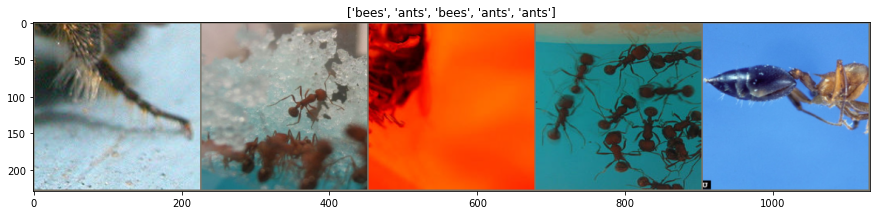

0 tensor([1, 0, 1, 0, 0])


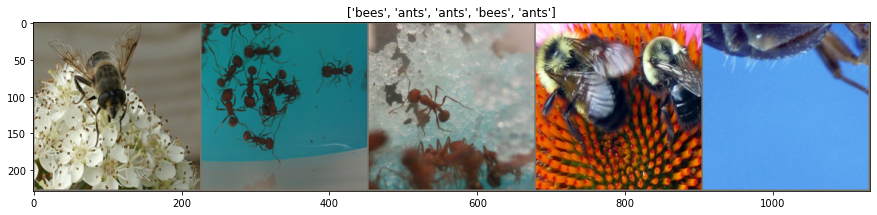

1 tensor([1, 0, 0, 1, 0])


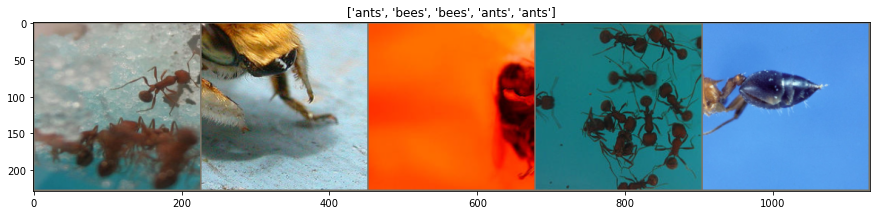

2 tensor([0, 1, 1, 0, 0])


In [ ]:
for i in range(3):
    inputs, classes = next(iter(dataloader))

    out = torchvision.utils.make_grid(inputs)  # inputs: 5, 3, 224, 224  ---> out: 3, 228, 1132
    imshow(out, title=[class_names[x] for x in classes])
    print(i, classes)

In [ ]:
len(dataloader)

3

## torchvision transform

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
import numpy as np


transform1 =transforms.RandomResizedCrop(18)
transform2 = transforms.ToTensor()  # 1. Image 또는 ndarray를 tensor로 변환. 2. HWC 또는 HW를 CHW로 만든다. 3. 정수값을 0~1 사이값으로 변환한다.
transform3 = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img = np.random.randint(0,256,size=(36,36,3)).astype(np.uint8)


a = Image.fromarray(img)  # a.size, a.height, a.width, a.mode  channel은 직접 확인 안된다.   <--- 0~255 값을 가진 uint8
print('shape of a: ', np.array(a).shape )


out1 = transform1(a) # PIL.Image.Image in PIL.Image.Image out   <--- 0~255 값을 가진 uint8


out2 = transform2(out1)  # PIL.Image.Image in torch tensor out. unit8 (HWC 또는 HW) --> CHW(0~1)  <--- 여기서, 0~1의 tensor로 변환
out3 = transform3(out2)  # (x-m)/s

print(out2.mean(axis=(1,2)))
print(out3.mean(axis=(1,2)))

print((out2.mean(axis=(1,2))- torch.tensor([0.485, 0.456, 0.406]))/torch.tensor([0.229, 0.224, 0.225]))

transform4 = transforms.Grayscale(num_output_channels=1)  
out4 = transform4(a) # return PIL.Image.Image
print(np.array(out4).shape) # num_output_channels=1 --> shape (H,W).   num_output_channels=3 --> shape(H,W,3)

shape of a:  (36, 36, 3)
tensor([0.5059, 0.4878, 0.4871])
tensor([0.0914, 0.1419, 0.3606])
tensor([0.0914, 0.1419, 0.3606])
(36, 36)


In [ ]:
out2

# 2-1. tf.keras.preprocessing.image.ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [171]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [167]:
#data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'   # 테스트를 위해, data몇개만 모아, 작은 dataset을 만듬.
data_dir = './small'
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
#test_datagen = ImageDataGenerator(rescale=1./255)

#class_mode='categorical'  ==> label을 onehot으로 만들어서 return한다.
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=8,class_mode='categorical',shuffle=False)

print('class name: ', train_generator.class_indices)  # list(train_generator.class_indices) ==> ['ants', 'bees']

print('batch_size = ',  train_generator.batch_size, 'image shape: ', train_generator.image_shape)

Found 8 images belonging to 2 classes.
class name:  {'ants': 0, 'bees': 1}
batch_size =  8 image shape:  (150, 150, 3)


In [168]:
iterator = iter(train_generator)
x,y = iterator.next()

In [169]:
x.shape, y.shape, type(x), type(y)

((8, 150, 150, 3), (8, 2), numpy.ndarray, numpy.ndarray)

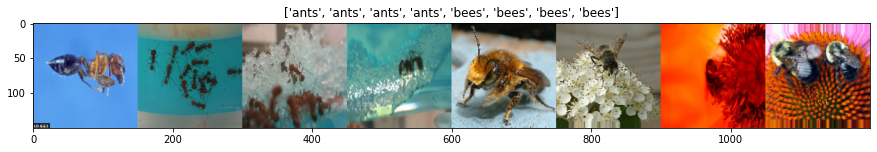

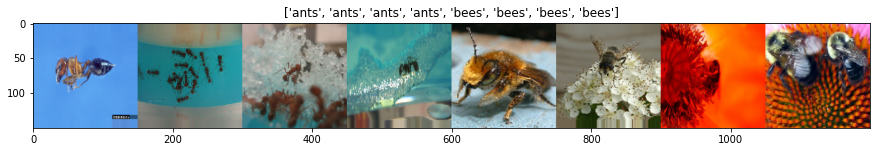

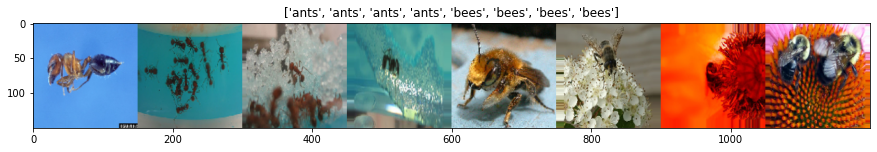

In [170]:
class_names = list(train_generator.class_indices.keys())
for i in range(3):
    inputs, classes = next(iter(train_generator))
    inputs = np.concatenate(inputs, axis=1)  # (N,150,150,3)  ==> (150,750,3)
    classes = classes.argmax(axis=-1)
    plt.figure(figsize=(15,35))
    plt.imshow(inputs)
    plt.title([class_names[x] for x in classes])
    plt.show()

In [ ]:
train_generator.classes

array([0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
train_generator.filenames

['ants\\0013035.jpg',
 'ants\\5650366_e22b7e1065.jpg',
 'ants\\6240329_72c01e663e.jpg',
 'ants\\6240338_93729615ec.jpg',
 'bees\\16838648_415acd9e3f.jpg',
 'bees\\17209602_fe5a5a746f.jpg',
 'bees\\21399619_3e61e5bb6f.jpg',
 'bees\\29494643_e3410f0d37.jpg']

In [ ]:
list(train_generator.class_indices)

['ants', 'bees']

# 2-2. tf.keras.preprocessing.image.ImageDataGenerator + Preprocessing
- ImageDataGenerator 자체적으로 preprocessing을 많이 제공함.
- preprocessing_function도 argmument로 넘길 수 있는데, 자체적으로 많이 제공하기 때문에 굳이???
- preprocessing_function(image)와 같이 하나의 argument만 처리하면 된다.

In [214]:
def my_preprocessing(image):
    image = image/255.   # tf.image.convert_image_dtype는 정수가 들어 왔을 때, 0~1로 변환한다. 넘어온 image에는 resize되면서 0~255사이의 float 값이 들어 있다.

    #image = tf.image.random_flip_left_right(image)  # 확률 50%로 고정되어 있음.
    #image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)  # 채도 조절
    
    # random crop
    image = tf.image.random_crop(image,(100,100,3))
    image = tf.image.resize(image,(128,128))

    image = tf.clip_by_value(image, 0.0, 1.0)

    return image

In [215]:
#data_dir = r'D:\hccho\CommonDataset\hymenoptera_data\small'   # 테스트를 위해, data몇개만 모아, 작은 dataset을 만듬.
data_dir = './small'
train_datagen = ImageDataGenerator(preprocessing_function=my_preprocessing,rotation_range=45)

#class_mode='categorical'  ==> label을 onehot으로 만들어서 return한다.
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(128,128), batch_size=8,class_mode='categorical',shuffle=False)  # target_size로 preprocessing에서 처리한 크기가 넘어가야 한다.

print('class name: ', train_generator.class_indices)  # list(train_generator.class_indices) ==> ['ants', 'bees']

print('batch_size = ',  train_generator.batch_size, 'image shape: ', train_generator.image_shape)

Found 8 images belonging to 2 classes.
class name:  {'ants': 0, 'bees': 1}
batch_size =  8 image shape:  (128, 128, 3)


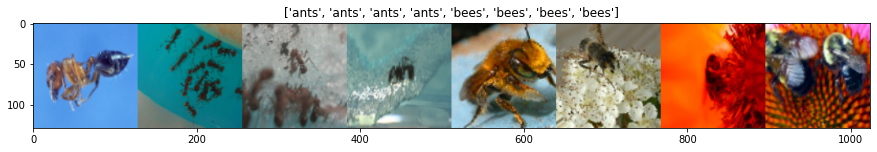

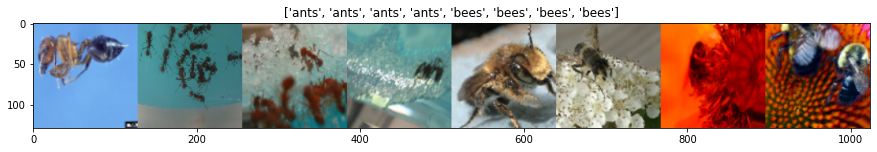

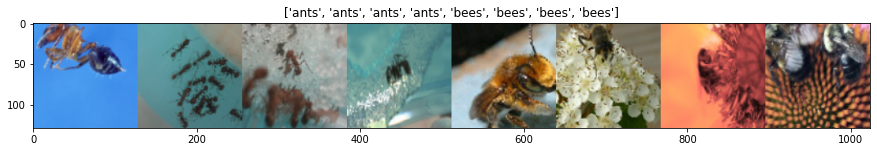

In [217]:
class_names = list(train_generator.class_indices.keys())
for i in range(3):
    inputs, classes = next(iter(train_generator))
    inputs = np.concatenate(inputs, axis=1) 
    classes = classes.argmax(axis=-1)
    plt.figure(figsize=(15,35))
    plt.imshow(inputs)
    plt.title([class_names[x] for x in classes])
    plt.show()

# 2-3. ImageDataGenerator --> fit()
- featurewise_center: fit(data)에서 channel 별로 mean을 구해서, flow data에서 평균 차감.
- samplewise_center: flow()에 넘어오는 mini-batch 각각의 자체적으로 평균 0으로 만듬.  ==> fit이 없다

In [234]:
# featurewise_center   ===> fit 과정에서 전체의 평균이 계산되어 저장된다.
X = np.random.randint(255,size=(10,4,4,3))
X_test = np.random.randint(255,size=(10,4,4,3))
datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)   # featurewise_center: 각 channel 평균

datagen.fit(X)  # featurewise_center or featurewise_std_normalization or zca_whitening  ---> 이 3가지에 대해서만 working
print('mean: ', datagen.mean, (X/255).mean(axis=(0,1,2)))


test_generator = datagen.flow(X_test, shuffle=False)  # data X_test에서 data.mean을 빼는 것 뿐.

x = next(iter(test_generator))  # x는 X_test 전체에서 수정된 것.
print(x.shape)
print("allclose: ", np.allclose(X_test/255. - datagen.mean, x,atol=1e-06))
print(np.abs((X_test/255. - datagen.mean)-x).max())

mean:  [[[0.5052697 0.5070342 0.5090441]]] [0.50526961 0.50703431 0.50904412]
(10, 4, 4, 3)
allclose:  True
7.433049820093629e-08


In [226]:
# samplewise_center   ==> 각각의 data 별로 처리되기 때문에 fit()은 없다.  ===> mini batch별로 이루어진다.

X = np.random.randint(255,size=(10,4,4,3))
datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True)

train_generator = datagen.flow(X, batch_size=5, shuffle=False)  # data X_test에서 data.mean을 빼는 것 뿐.
print(X.shape)
it = iter(train_generator)

for _ in range(3):
    x = next(it)
    print(x.shape, x.mean())

#print(f'{x.mean():.5f}')

(10, 4, 4, 3)
(5, 4, 4, 3) 3.973643e-09
(5, 4, 4, 3) 4.4703485e-09
(5, 4, 4, 3) 3.973643e-09


# 3-1. tf.keras.preprocessing.image_dataset_from_directory
- function으로 dataset을 return한다.
- image를 resize에서 읽어들이는데 그친다. rescale 옵션이 없다.
- preprocessing은 dataset의 map에서 처리해야 한다. 

In [ ]:
# ".ipynb_checkpoints"라는 숨어있는 디렉토리가 있어, 제거했다 ==> rm -r 디렉토리명
ds = tf.keras.preprocessing.image_dataset_from_directory('./small',class_names=None, color_mode='rgb', batch_size=8, image_size=(128,128), shuffle=False)
class_names = ds.class_names
ds = ds.repeat(10)

Found 8 files belonging to 2 classes.


In [ ]:
for x,y in ds.take(1):
    print(x.shape, y)

(8, 128, 128, 3) tf.Tensor([0 0 0 0 1 1 1 1], shape=(8,), dtype=int32)


In [ ]:
print(class_names)

['ants', 'bees']


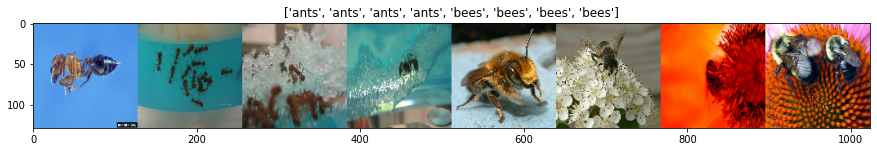

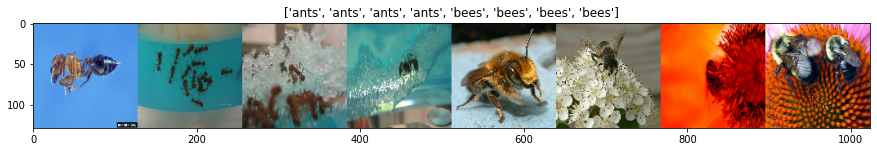

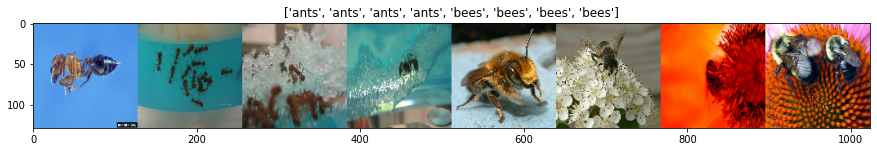

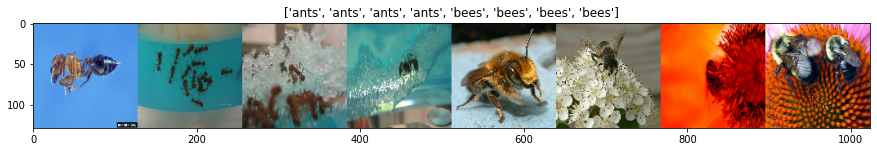

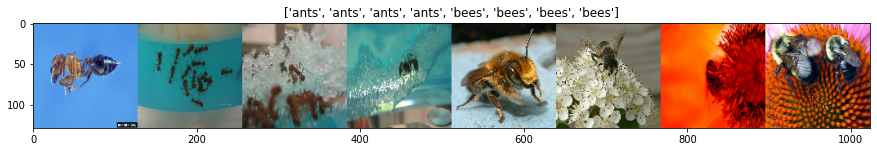

In [ ]:
it = iter(ds)
for i in range(5):
    x, y = next(it)
    x = np.concatenate(x.numpy(), axis=1)  # (N,150,150,3)  ==> (150,750,3)
    plt.figure(figsize=(15,35))
    plt.imshow(x.astype(np.int))
    plt.title([class_names[i] for i in y])
    plt.show()

# 3-2. tf.keras.preprocessing.image_dataset_from_directory + preprocessing mapping

In [162]:
ds = tf.keras.preprocessing.image_dataset_from_directory('./small',class_names=None, color_mode='rgb', batch_size=8, image_size=(150,150), shuffle=False)
class_names = ds.class_names
ds

Found 8 files belonging to 2 classes.


<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

In [163]:
def my_preprocessing(image,label):

    image = image/255.   # tf.image.convert_image_dtype는 정수가 들어 왔을 때, 0~1로 변환한다. 넘어온 image에는 resize되면서 0~255사이의 float 값이 들어 있다.

    #image = tf.image.random_flip_left_right(image)  # 확률 50%로 고정되어 있음.
    #image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)  # 채도 조절
    
    # random crop
    shape = tf.shape(image)  # batch size 알아내기
    #image = tf.image.resize(image, (180,180))
    image = tf.image.random_crop(image,(shape[0],128,128,3))

    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label


In [164]:
ds = ds.map(my_preprocessing)
ds = ds.repeat(5)

print(ds)

<RepeatDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


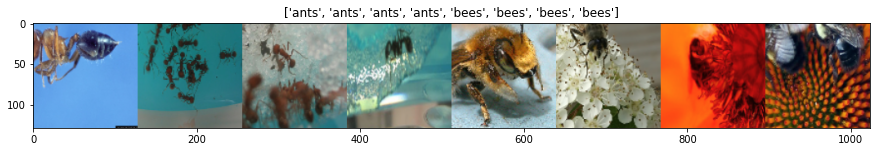

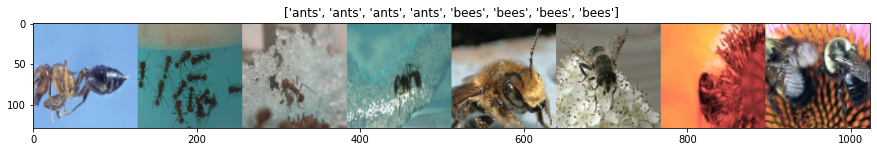

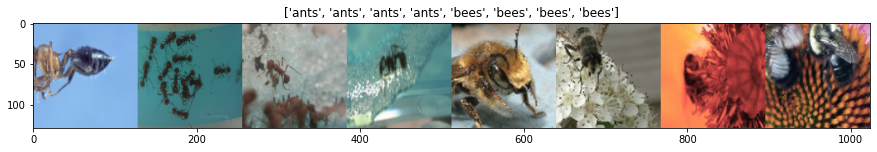

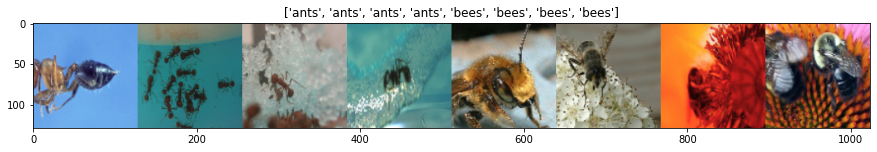

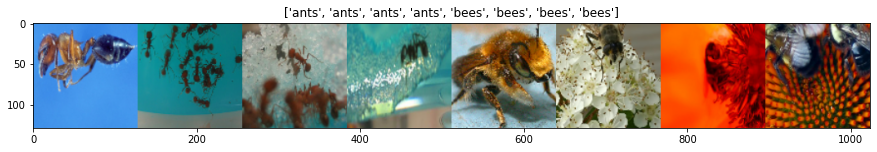

In [165]:
it = iter(ds)
for i in range(5):
    x, y = next(it)
    x = np.concatenate(x.numpy(), axis=1)  # (N,150,150,3)  ==> (150,750,3)
    plt.figure(figsize=(15,35))
    plt.imshow(x)
    plt.title([class_names[i] for i in y])
    plt.show()